In [276]:
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import numpy as np
import copy
from collections import Counter


from sklearn.cluster import DBSCAN

# path to datatset
mnist = '/media/andrew/MLData/mnist/'
sprites = './data/sprite/'

torch.Size([1, 20, 1, 128, 128]) torch.IntTensor


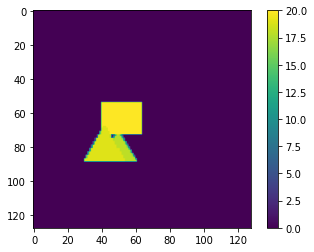

In [291]:
with open(sprites + 'pt/input/train_10.pt', 'rb') as f:
    img = torch.load(f)
    img = img.type(torch.int)
print(img.shape, img.type())

plt.figure()
plt.imshow(img[0,6, 0, ...].detach().numpy())
plt.colorbar()
plt.show()


tensor([0, 1], dtype=torch.int32)
tensor([[ 51,  48],
        [ 51,  49],
        [ 51,  50],
        [ 52,  48],
        [ 52,  49],
        [ 52,  50],
        [ 52,  51],
        [ 52,  63],
        [ 52,  64],
        [ 52,  65],
        [ 52,  66],
        [ 52,  67],
        [ 52,  68],
        [ 53,  47],
        [ 53,  48],
        [ 53,  49],
        [ 53,  50],
        [ 53,  51],
        [ 53,  62],
        [ 53,  63],
        [ 53,  64],
        [ 53,  65],
        [ 53,  66],
        [ 53,  67],
        [ 53,  68],
        [ 53,  69],
        [ 54,  47],
        [ 54,  48],
        [ 54,  49],
        [ 54,  50],
        [ 54,  60],
        [ 54,  61],
        [ 54,  62],
        [ 54,  63],
        [ 54,  64],
        [ 54,  65],
        [ 54,  66],
        [ 54,  67],
        [ 54,  68],
        [ 54,  69],
        [ 55,  46],
        [ 55,  47],
        [ 55,  48],
        [ 55,  49],
        [ 55,  60],
        [ 55,  61],
        [ 55,  62],
        [ 55,  63],
      

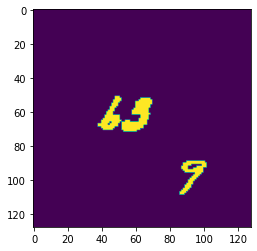

In [68]:
normed = torch.where(img[4,5,0, ...] > 0, torch.tensor([1]).type(torch.int), torch.tensor([0]).type(torch.int) )
clusters = torch.unique(normed)
print(clusters)
print (torch.nonzero(normed))

plt.figure()
plt.imshow(normed.detach().numpy())
plt.show()


In [260]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*',
                s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(
        dbscan.eps, dbscan.min_samples), fontsize=14)
    plt.xlim(left = 0, right = 128)
    plt.ylim(bottom = 0, top = 128)
    plt.show()


In [261]:
def label_clusters(atensor):
    norm_frame = torch.where(atensor > 0, torch.tensor([1]).type(torch.int), torch.tensor([0]).type(torch.int) )
    # print(norm_frame.shape)
    plt.figure()
    plt.imshow(norm_frame.detach().numpy())
    plt.show()
    unique_indx = torch.nonzero(norm_frame)
    # print(unique_indx.shape)
    if unique_indx.size(0) > 1:
        # dbscan will label the clusters
        dbscan = DBSCAN(eps=1, min_samples=1)
        dbscan.fit(unique_indx)
        plot_dbscan(dbscan, unique_indx, size=100)
        # print('Labels: ', Counter(dbscan.labels_).keys())
        # print('Label Counts: ', Counter(dbscan.labels_).values())
    else:
        print('NONE')


torch.Size([64, 20, 1, 128, 128])


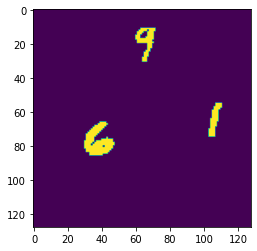

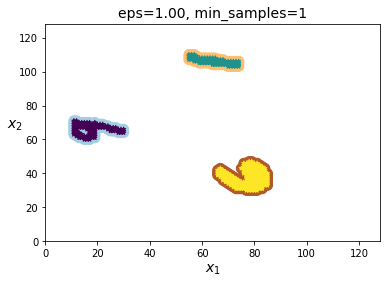

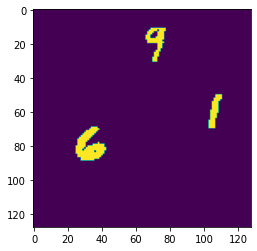

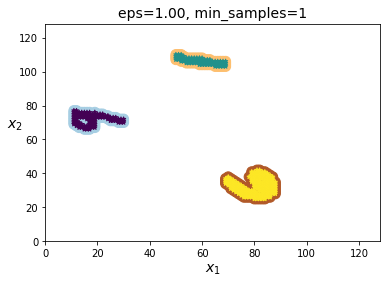

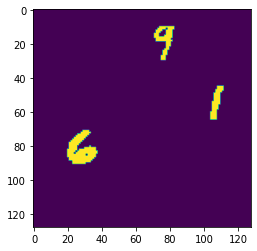

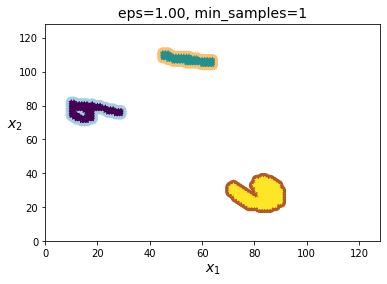

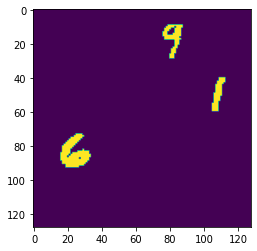

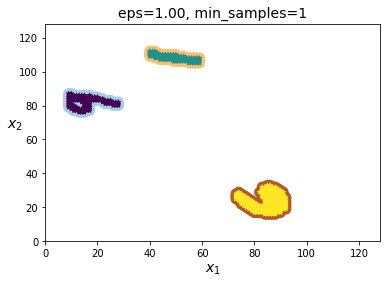

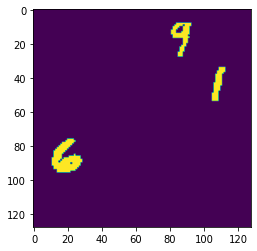

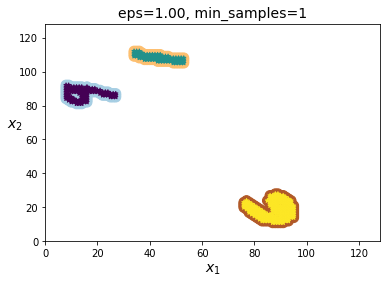

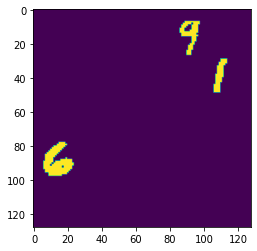

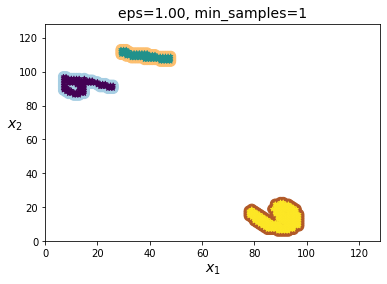

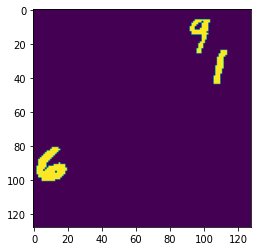

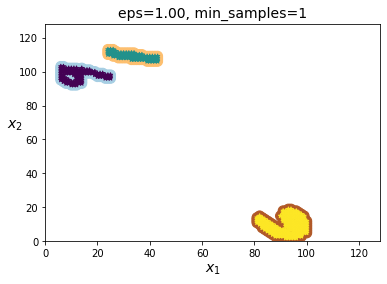

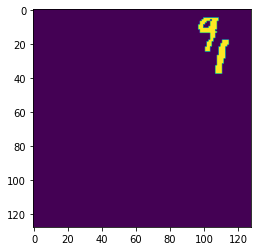

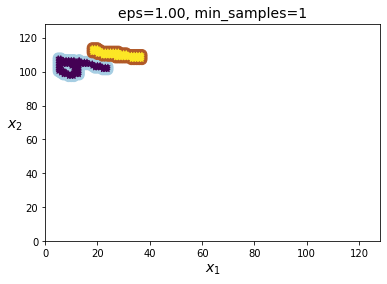

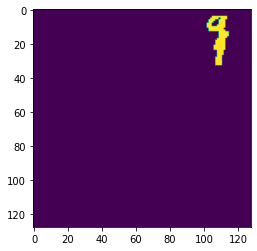

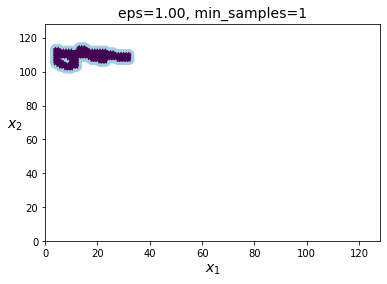

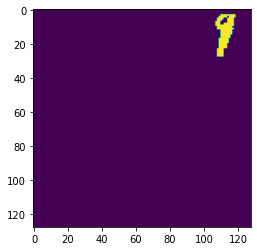

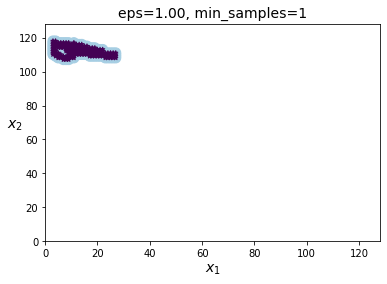

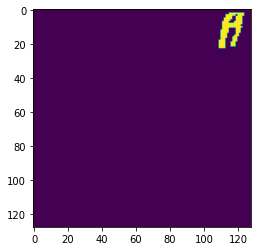

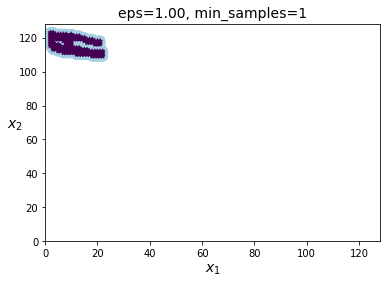

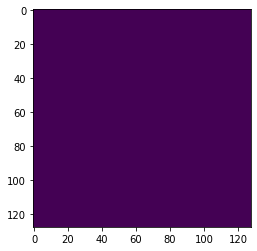

NONE


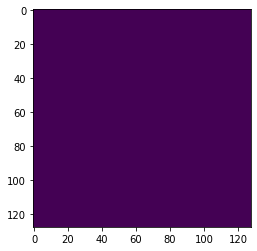

NONE


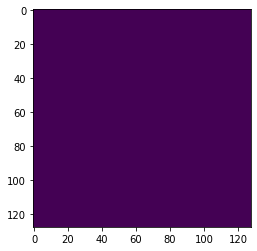

NONE


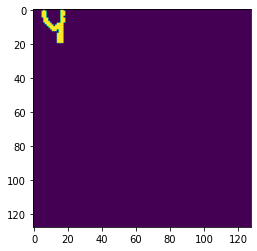

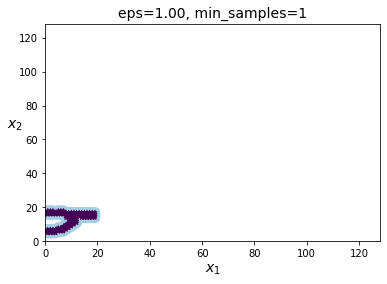

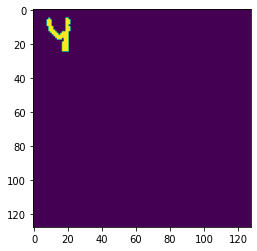

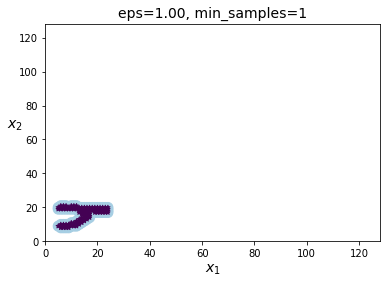

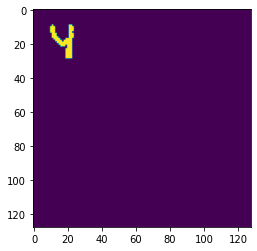

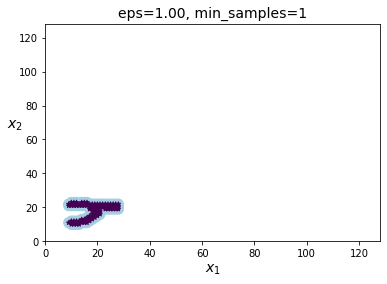

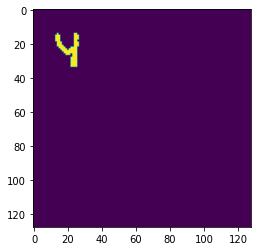

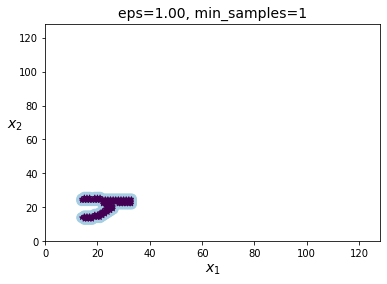

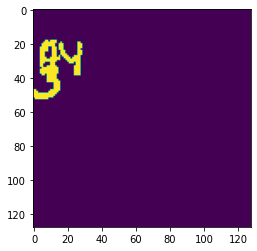

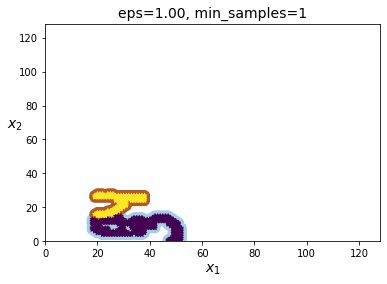

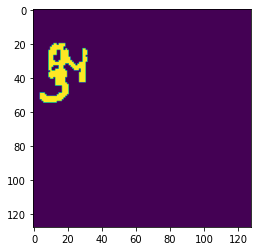

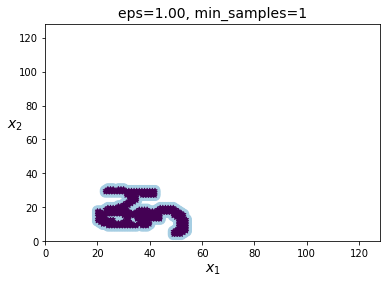

In [264]:
print(img.shape)

for t in range(0, img.size(1)):
    label_clusters(copy.deepcopy(img[0,t,0, ...]))  